
# üßë‚Äçüíª K-Nearest Neighbors (KNN) Workshop

Welcome to the **KNN Active Learning Workshop**!  
In this session, you will learn how to apply the **K-Nearest Neighbors algorithm** in practice, while also exploring **data analysis techniques** and **machine learning design patterns**.

This workshop is designed for **peer programming** and **active learning** ‚Äî you will collaborate with classmates to brainstorm, code, and reflect.

---



## üéØ Learning Objectives

By the end of this workshop, you should be able to:

1. Explain the intuition behind the K-Nearest Neighbors algorithm.  
2. Acquire and preprocess datasets from different sources (CSV, APIs, Relational Databases).  
3. Apply KNN for classification on multiple datasets.  
4. Use the **Machine Learning Pipeline Pattern** to architect modular, reproducible ML code.  
5. Reflect on KNN‚Äôs performance, strengths, and limitations, and when to apply it in real-world scenarios.  

---



## ‚è≥ Before the Workshop

Make sure you are ready with the following setup:

1. **Environment Setup**  
   - Use Python 3.9+ with `scikit-learn`, `pandas`, `matplotlib`, `requests`, and `sqlalchemy`.  
   - You can install everything with:  
     ```bash
     pip install scikit-learn pandas matplotlib requests sqlalchemy psycopg2-binary
     ```

2. **Data Sources**  
   You will use **three types of data sources** in this workshop:
   - **CSV file**: e.g., [UCI ML Repository](https://archive.ics.uci.edu/) datasets.  
   - **API**: e.g., the [OpenWeather API](https://open-meteo.com/) for weather data.  
   - **Relational Database**: either connect to a public database or create your own using [Neon](https://neon.com/).  

   üëâ Bring at least one dataset of your choice from *each category*.  

3. **Peer Programming**  
   - Pair up with another student.  
   - Take turns: one codes, one reviews. Switch every 15 minutes.  


## üß© Explore the KNN Algorithm with a Simulator

Before coding, let‚Äôs explore how KNN works visually. This simulator allows you to place data points on a 2D plane, adjust the number of neighbors (*k*), and observe how predictions change based on distance and class boundaries. Experimenting here builds intuition before we implement KNN in Python.

üîó [Interactive KNN Simulator](https://k-nearest-neighbors.vercel.app/)

---



## üå∏ Part 1: Warm-up with the Iris Dataset

We‚Äôll begin with the **Iris dataset**, a classic dataset in machine learning.

**Task:** Implement and evaluate a KNN classifier to predict the species of iris flowers.



In [7]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


Now that we‚Äôve trained and evaluated a KNN classifier on the Iris dataset, let‚Äôs move from raw accuracy metrics to a more visual understanding. By plotting the first two features‚Äî**sepal length** and **sepal width**‚Äîwe can observe how different iris species cluster, and how KNN relies on these dimensions for classification.


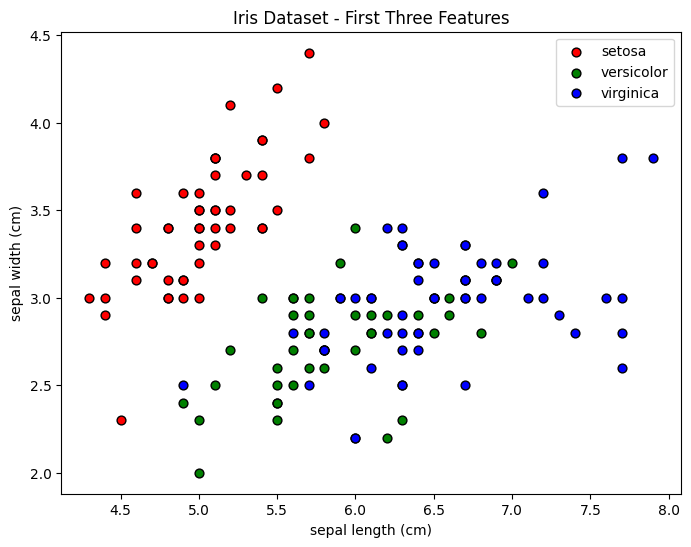

In [ ]:
import matplotlib.pyplot as plt

# Use the first two features for visualization
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset - First Two Features")
plt.legend()
plt.show()

The scatter plot gave us a visual sense of how the Iris data clusters when using sepal length and width. To move beyond visualization, we now use our trained KNN model to make predictions on unseen test data, evaluate its accuracy, and inspect example classifications in detail.  

üí° **Note for reflection:** The performance of KNN depends heavily on two design choices:  
1. The value of *k* (number of neighbors).  
2. How features are scaled (since distances drive the algorithm).  

Think about how changing either might alter your results.


In [5]:
# Predict the species for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier for Iris Dataset")
sample_idx = 10
print("Sample features:", X_test[sample_idx])
print("True label:", y_test[sample_idx])
print("Predicted label:", y_pred[sample_idx])
#print("Test data sample:", X_test)
#print("Test data predictions:", y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Explanation:
# KNN classifies a new data point by looking at the 'k' closest labeled data points in the training set.
# The majority label among these neighbors is assigned to the new point.
# In this example, we use KNN to classify iris flowers based on their features.

KNN Classifier for Iris Dataset
Sample features: [6.5 3.2 5.1 2. ]
True label: 2
Predicted label: 2
Test set accuracy: 1.00


By comparing predicted labels against the ground truth, we can directly measure how well the model generalizes beyond the training set. Accuracy provides a simple performance metric, but it is equally valuable to look at individual predictions. This allows us to interpret success cases and identify where the model struggles.

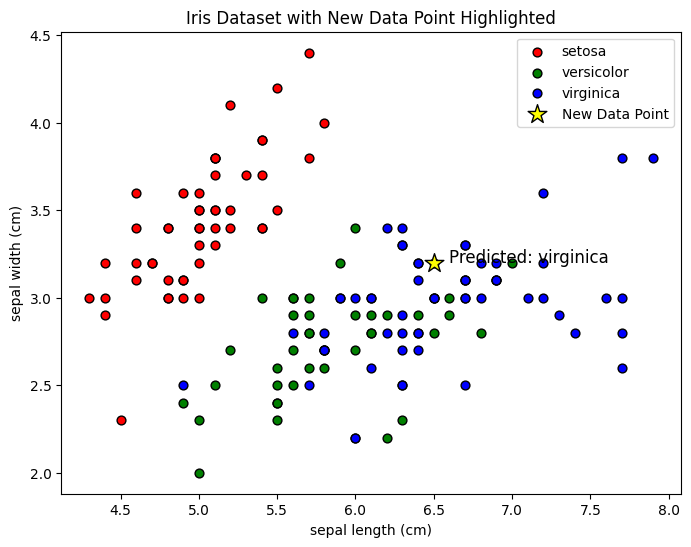

In [6]:
# Visualize the new data point (from X_test[sample_idx]) in the context of the entire dataset
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)

# Plot the new data point
plt.scatter(X_test[sample_idx, 0], X_test[sample_idx, 1], 
            c='yellow', edgecolor='black', s=200, marker='*', label='New Data Point')

# Annotate with predicted class
predicted_label = y_pred[sample_idx]
plt.text(X_test[sample_idx, 0]+0.1, X_test[sample_idx, 1], 
         f'Predicted: {iris.target_names[predicted_label]}', fontsize=12, color='black')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset with New Data Point Highlighted")
plt.legend()
plt.show()


## üìä Part 2: Apply KNN on a Real-World Dataset

Now it‚Äôs your turn to **go beyond the Iris dataset**.

### Step 1: Acquire Data
Choose one of the following:  
- **CSV**: Download a dataset (e.g., Titanic dataset from Kaggle or UCI).  
- **API**: Query an API like OpenWeather or a sports stats API. Use `requests` to fetch JSON data.  
- **Database**: Connect to a Neon-hosted PostgreSQL database.  

üëâ Work with your partner to **select a real-world dataset** that excites you.  

### Step 2: Preprocess Data
- Clean missing values.  
- Normalize numerical features.  
- Encode categorical variables if needed.  

### Step 3: Implement KNN
- Split into train/test sets.  
- Fit KNN.  
- Evaluate accuracy, precision, recall, or other metrics as appropriate.  



In [ ]:

# Example: Loading a dataset from an API (Open-Meteo)
import requests
import pandas as pd

url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data['hourly'])
print(df.head())

# TODO: Preprocess this dataset and apply KNN



## üèóÔ∏è Part 3: Architecting with the ML Pipeline Pattern

In professional ML, we use the **Machine Learning Pipeline Pattern**:  

- Chain modular components in a **linear sequence** or **DAG structure**.  
- Each step should be reusable, testable, and clearly defined.  

Example pipeline for KNN:  
1. **Data Acquisition** ‚Üí from CSV/API/DB  
2. **Data Cleaning & Preprocessing** ‚Üí normalization, encoding, etc.  
3. **Feature Engineering**  
4. **Model Training**  
5. **Evaluation & Validation**  
6. **Deployment / Reflection**  

üëâ Your task: Implement your experiment using **functions or classes** for each stage.  


In [ ]:

# Example scaffold for ML pipeline pattern

def load_data():
    # TODO: Implement CSV/API/DB loader
    pass

def preprocess_data(X):
    # TODO: Normalize or scale features
    pass

def train_model(X_train, y_train, k=5):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

# TODO: Chain these functions in sequence (Pipeline Pattern)


## üîç End of Part 1: Reflection

Discuss the following with your peers:  

1. How did KNN perform on your dataset?  
2. What preprocessing decisions most affected performance?  
3. What are the strengths and weaknesses of KNN?  
4. When would you **not** use KNN in practice?  
5. How could this workflow be extended in an **MLOps context** (automation, CI/CD, monitoring)?  

üëâ Write your reflections in the cell below.


#### üí≠ Reflection: Add Your Talking Points

---
TODO: Your reflection goes here


---

<br>
<br>
<br>


## üöÄ Challenge

Your **challenge is to implement KNN on a brand new dataset** (not Iris).  

- Acquire data from an API or a database.  
- Preprocess it properly.  
- Train and evaluate KNN.  
- Compare results with your peers.  
- **Bonus:** Try tuning hyperparameters (number of neighbors, distance metric).  

### ü§ù Peer Programming Exercise

This workshop is based on **active learning** and requires you to engage in **peer programming** with your classmates.  
Peer programming means that two students work together on the same code:  

- **Driver:** Types the code, explains aloud what they are doing.  
- **Navigator:** Reviews, asks questions, spots mistakes, and thinks strategically about next steps.  

Switch roles every 15‚Äì20 minutes.  

### üìù Step-by-Step Exercise

Work with your partner to complete the following exercise:  

1. **Acquire data**  
   - Choose a dataset from an API (e.g., weather, finance, or sports stats) or connect to a relational database (e.g., using [Neon](https://neon.com/) for PostgreSQL).  
   - Make sure the dataset has at least one categorical label or target variable you can predict.  

2. **Preprocess data**  
   - Handle missing values.  
   - Normalize or scale numerical features.  
   - Encode categorical features as needed.  

3. **Implement KNN using the Pipeline Pattern**  
   - Structure your code into modular functions (or classes) for **data loading, preprocessing, training, and evaluation**.  
   - Chain them together in a clear pipeline.  

4. **Train and evaluate KNN**  
   - Split the dataset into training and test sets.  
   - Fit the KNN model.  
   - Evaluate performance using accuracy, precision, recall, or other suitable metrics.  

5. **Compare results with your peers**  
   - Share your dataset choice, preprocessing decisions, and model results.  
   - Discuss why results may differ across teams.  
   - Reflect on whether KNN was the best choice for your dataset.  

### üì§ Workshop Submission Instructions

To complete the workshop, follow these steps carefully:

1. **Clone the instructor‚Äôs repository**  
   ```bash
   git clone https://github.com/ProfEspinosaAIML/KNearestNeighbors_Workshop.git
   cd KNearestNeighbors_Workshop

2. **Create your solution notebook**  
   - Add a new file called: **KNN_Workshop_Solution.ipynb**
   - Implement your code and include Markdown explanations of your thought process, results, and reflections.

3. **Add documentation**  
   - Create a README.md file with your name, student ID, and a short summary of your work.

4. **Commit to your local repo**  
   - git add KNN_Workshop_Solution.ipynb README.md
   - git commit -m "Add solution notebook and summary"

5. **Commit to your local repo**  
   - Push to your own remote repo
   - Create a new repository on GitHub called: **KNearestNeighbors_Workshop**
   - Push your code there.

6. **Submit your work**  
   - Create a PDF file with your name and your student ID
   - The URL to your remote repository 
   - Submit the PDF to the dropbox.


---

‚úÖ You‚Äôve now completed the **KNN Active Learning Workshop**.  
You explored multiple data sources, implemented KNN, applied the ML Pipeline Pattern, and reflected on results.

üëè Great work ‚Äî keep building!  
